### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

>**One-vs-one** classification picks 2 classes at a time, and train using samples from the selected two classes only. Then repeat it with all combinations where first class != second class, after that we have $\frac{n(n-1)}{2}$ models
>
>**One-vs-rest** classification picks just 1 class at a time and trains with the samples of the selected class on one side and all the other samples on the other side. Amount of models equal to the amount of classes.

In [33]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import numpy as np

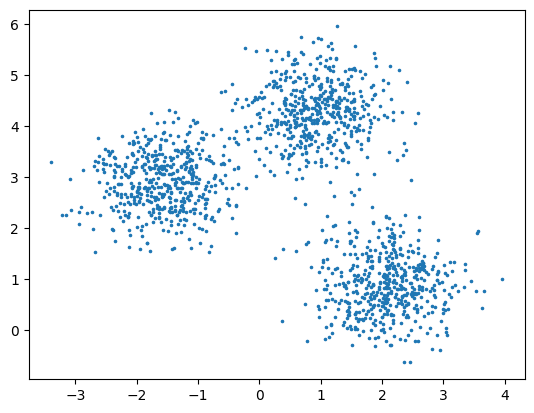

In [34]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1],  marker='.', s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [35]:
from sklearn.svm import SVC

In [36]:
try:
    model = SVC()
    model.fit(X,y)
    print("Model created")
except:
    print("Model isn't created")

Model created


In [56]:
#Universal plot generator
def plot_generator(model,ax=None):
    if ax is None:
        ax = plt.gca()
    x_lim,y_lim = ax.get_xlim(),ax.get_ylim()

    # create grid to evaluate model
    Y, X = np.meshgrid(
        np.linspace(y_lim[0], y_lim[1], 20), 
        np.linspace(x_lim[0], x_lim[1], 20)
    )
    P = model.predict(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape)
    
    ax.contour(X, Y, P, colors=[(0.3,0.25,0.75)],
               levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', "-", '--'])
    
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

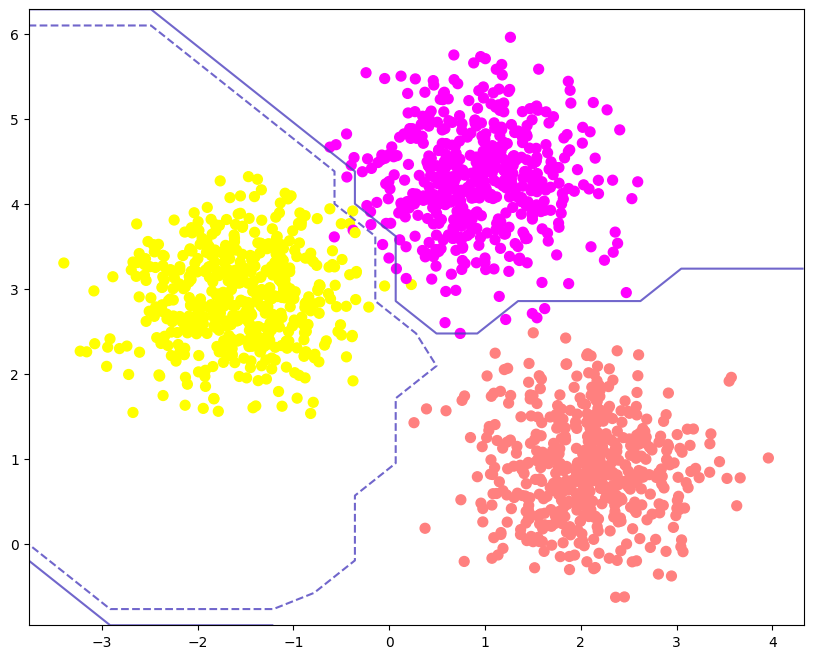

In [57]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
plot_generator(model)

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

In [58]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr = OneVsRestClassifier(estimator=SVC())
ovo = OneVsOneClassifier(estimator=SVC())

### Using 5-fold cross validation compare the accuracies of each method

In [59]:
# Your code here
from sklearn.model_selection import cross_val_score

def calc_score(model):
    return cross_val_score(model,X,y,scoring="f1_micro",cv=5)

ovo_score = calc_score(ovo)
ovr_score = calc_score(ovr)

print(f'For one_vs_one classifier, the mean metric is: {ovo_score.mean()}')
print(f'For one_vs_rest classifier, the mean metric is: {one_vs_rest_scores.mean()}')

For one_vs_one classifier, the mean metric is: 0.9973333333333333
For one_vs_rest classifier, the mean metric is: 0.9973333333333333


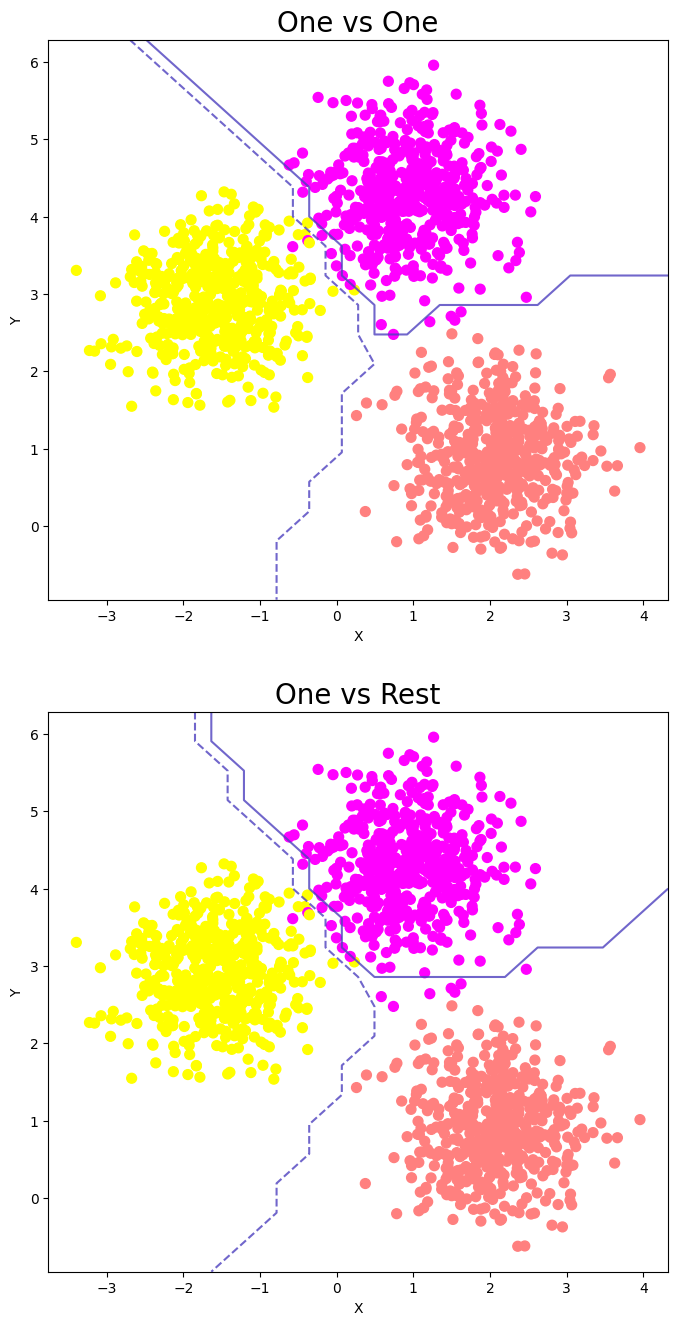

In [61]:
fig, axs = plt.subplots(2,1, figsize =(8, 16))

for ax in axs:
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="spring")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
axs[0].set_title("One vs One", fontsize=20)
axs[1].set_title("One vs Rest", fontsize=20)
    
plot_generator(ovo.fit(X, y), ax = axs[0])
plot_generator(ovr.fit(X, y), ax = axs[1])

> As we can see, both approaches give us same accuracy for our data, but results of models are still different (we can see it on the plot).
